## Made to see difference between rean and satellite data, for whole period, whole area

### Laget 18/3, path + data hentet fra remote

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy as ccrs
import numpy as np
import plot_timeseries as pt
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib.dates as mdates

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
path = '/Users/johannemehren/filer/'

ds1 = xr.open_dataset(path + 'gridfile_test.nc')
ds2 = xr.open_dataset(path + 'erai_regrid_5x5.nc')


#ds_erai = xr.open_dataset(path + 'erai.tp.ctp.monmean.zm.nc')
obs = xr.open_dataset(path + 'GPS-RO__CP_LR_5x5_2007-2018.nc')

In [4]:
obs_res = obs.resample(time='M').mean()
obs_res['time'] = ds1.time

In [5]:
ds2_sliced = ds2.sel(time=slice('2007-01-01', '2018-12-31'))
ds2_sliced['time'] = ds1.time

In [6]:
ds_erai_sl = ds_erai.sel(time=slice('2007-01-01', '2018-12-31'))
ds2_sliced['time'] = ds1.time

NameError: name 'ds_erai' is not defined

In [ ]:
diff_ctpt_era5 = ds1.ctpt.mean(axis=(1,2)) - obs_res.CP_T.mean(axis=(1,2))
diff_lrt_era5 = ds1.tpt.mean(axis=(1,2)) - obs_res.LR_T.mean(axis=(1,2))


diff_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-30,30)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-30,30)).mean(axis=(1,2)).values
diff_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-30,30)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-30,30)).mean(axis=(1,2)).values
#diff_ctpt_era5.mean(axis=(1,2)).plot()

In [18]:
blue1 = 'darkblue'
blue2 = 'cornflowerblue'

org1 = 'darkorange'
org2 = 'pink'


gr1 = 'darkgreen'
gr2 = 'limegreen'

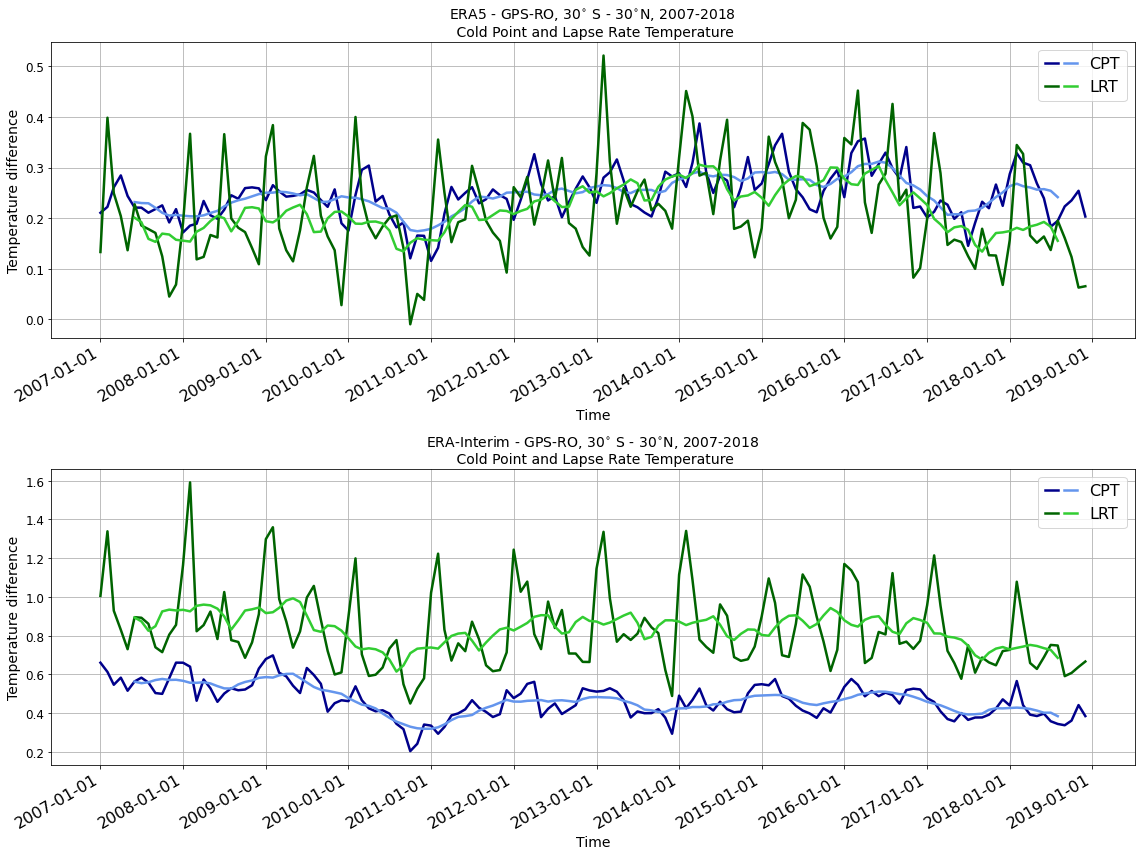

In [70]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

years = mdates.YearLocator() 

p1, = diff_ctpt_era5.plot(ax=axs[0], lw = 2.5, color = blue1)
p2, = diff_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], 
                                                        lw = 2.5, color=blue2 )
p3, = diff_lrt_era5.plot(ax=axs[0], lw = 2.5, color = gr1)
p4, = diff_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], lw = 2.5, color = gr2)
axs[0].set_title('ERA5 - GPS-RO, 30$^{\circ}$ S - 30$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

p5, = diff_ctpt_erai.plot(ax=axs[1],lw = 2.5, color = blue1)
p6, = diff_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], lw = 2.5, color = blue2)
p7, = diff_lrt_erai.plot(ax=axs[1], lw = 2.5, color = gr1)
p8, = diff_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], lw = 2.5, color = gr2)
axs[1].set_title('ERA-Interim - GPS-RO, 30$^{\circ}$ S - 30$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)


l = axs[0].legend([(p1, p2), (p3,p4)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)
l2 = axs[1].legend([(p5, p6), (p7,p8)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=16)


for ax in axs:
    #ax.legend(ncol = 2, fontsize=12)
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    ax.tick_params(axis="y", labelsize=12) 
    ax.xaxis.set_major_locator(years)
    ax.tick_params(axis="x", labelsize=16)
    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_3030_cpt-lrt.png')

In [16]:
diff2_ctpt_era5 = ds1.ctpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2))
diff2_lrt_era5 = ds1.tpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-20,20)).mean(axis=(1,2))


diff2_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2)).values
diff2_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-20,20)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-20,20)).mean(axis=(1,2)).values

In [9]:
obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2)).max()

<xarray.DataArray 'CP_T' ()>
array(195.64342, dtype=float32)

In [15]:
obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2))[19:20]

<xarray.DataArray 'CP_T' (time: 1)>
array([195.64342], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2008-08-01

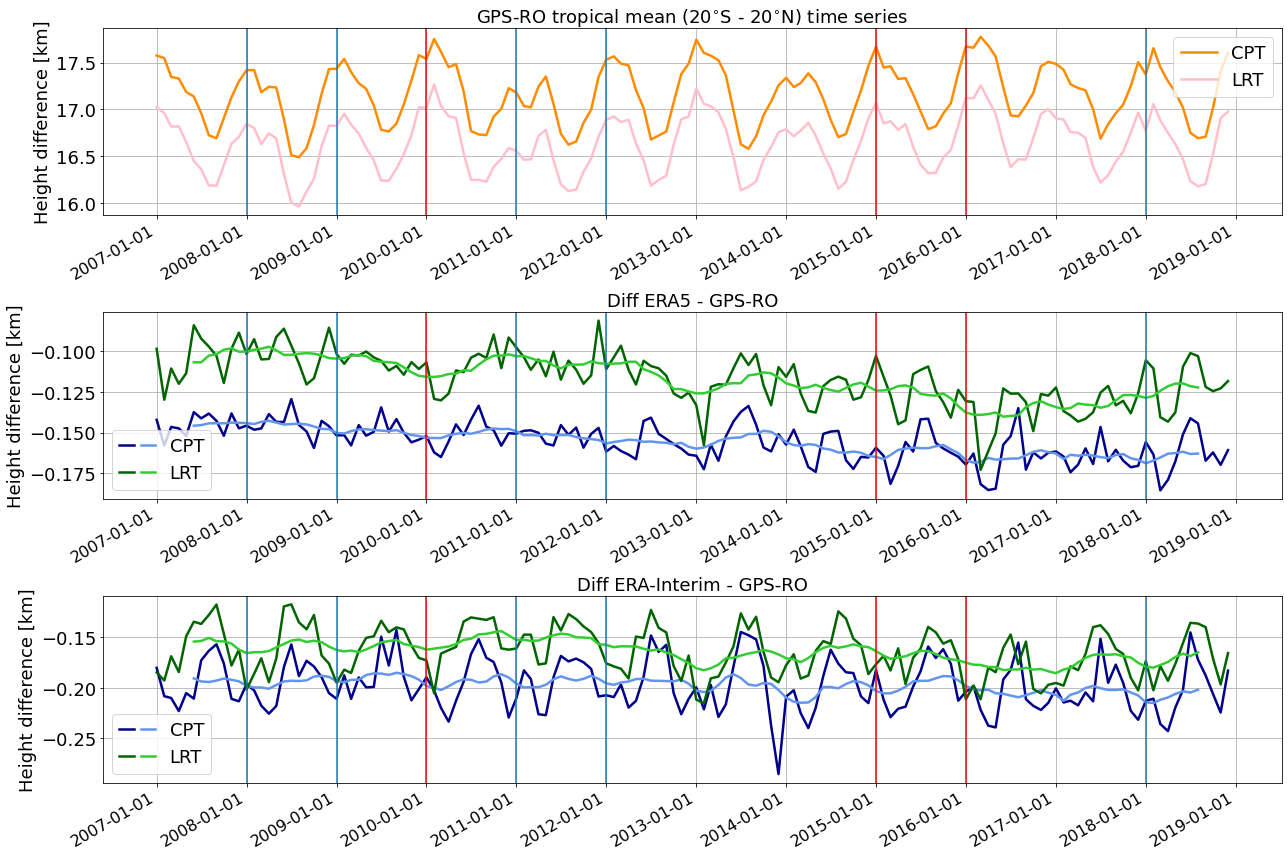

In [21]:
fig, axs = plt.subplots(3,1, figsize=(18,12))
years = mdates.YearLocator()

obs_res.CP_T.sel(lat=slice(-20,20)).mean(axis=(1,2)).plot(ax=axs[0], lw=2.5, color = org1, label = 'CPT')
obs_res.LR_T.sel(lat=slice(-20,20)).mean(axis=(1,2)).plot(ax=axs[0],  lw=2.5, color = org2, label = 'LRT')
#yy_2.plot(ax=axs[0], color = 'purple')

axs[0].legend(fontsize=18)
axs[0].set_title('GPS-RO tropical mean ($20^{\circ}$S - $20^{\circ}$N) time series', fontsize=18)

p1, =diff2_ctpt_era5.plot(ax=axs[1],  lw=2.5, color = blue1)
p2, = diff2_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[1], lw=2.5, color = blue2)
p3, = diff2_lrt_era5.plot(ax=axs[1], lw=2.5, color=gr1)
p4, = diff2_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[1], lw=2.5, color=gr2)
axs[1].set_title('Diff ERA5 - GPS-RO',
                fontsize=18)

p5, = diff2_ctpt_erai.plot(ax=axs[2], color = blue1, lw=2.5)
p6, = diff2_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[2], color=blue2, lw=2.5)
p7, = diff2_lrt_erai.plot(ax=axs[2], color=gr1, lw=2.5)
p8, = diff2_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[2], color=gr2, lw=2.5)
axs[2].set_title('Diff ERA-Interim - GPS-RO',
                fontsize=18)

l = axs[1].legend([(p1, p2), (p3,p4)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=18)
l2 = axs[2].legend([(p5, p6), (p7,p8)], ['CPT', 'LRT'], numpoints=1,
               handler_map={tuple: HandlerTuple(ndivide=None)}, fontsize=18)
#axs[2].set_yticks([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])


for ax in axs:
    ax.grid()
    ax.set_ylabel('Temp difference [K]', fontsize=18)
    ax.set_xlabel("")
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(axis="x", labelsize=18)
    ax.xaxis.set_major_locator(years)
    ax.tick_params(axis="x", labelsize=16)
    ax.format_xdata = mdates.DateFormatter('%Y')
    
    ax.axvline(pd.Timestamp('2010-01-01'), color = 'r')
    ax.axvline(pd.Timestamp('2015-01-01'), color = 'r')
    ax.axvline(pd.Timestamp('2016-01-01'), color = 'r')
    


    ax.axvline(pd.Timestamp('2008-01-01'), color = 'C0')
    ax.axvline(pd.Timestamp('2009-01-01'), color = 'C0')
    ax.axvline(pd.Timestamp('2011-01-01'), color = 'C0')
    ax.axvline(pd.Timestamp('2012-01-01'), color = 'C0')
    ax.axvline(pd.Timestamp('2018-01-01'), color = 'C0')

    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_2020_cpt-lrt_new.png', dpi=300)

In [10]:
diff3_ctpt_era5 = ds1.ctpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-10,10)).mean(axis=(1,2))
diff3_lrt_era5 = ds1.tpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-10,10)).mean(axis=(1,2))


diff3_ctpt_erai = ds2_sliced.ctpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.CP_T.sel(lat=slice(-10,10)).mean(axis=(1,2))
diff3_lrt_erai = ds2_sliced.tpt.sel(lat=slice(-10,10)).mean(axis=(1,2)) - obs_res.LR_T.sel(lat=slice(-10,10)).mean(axis=(1,2))

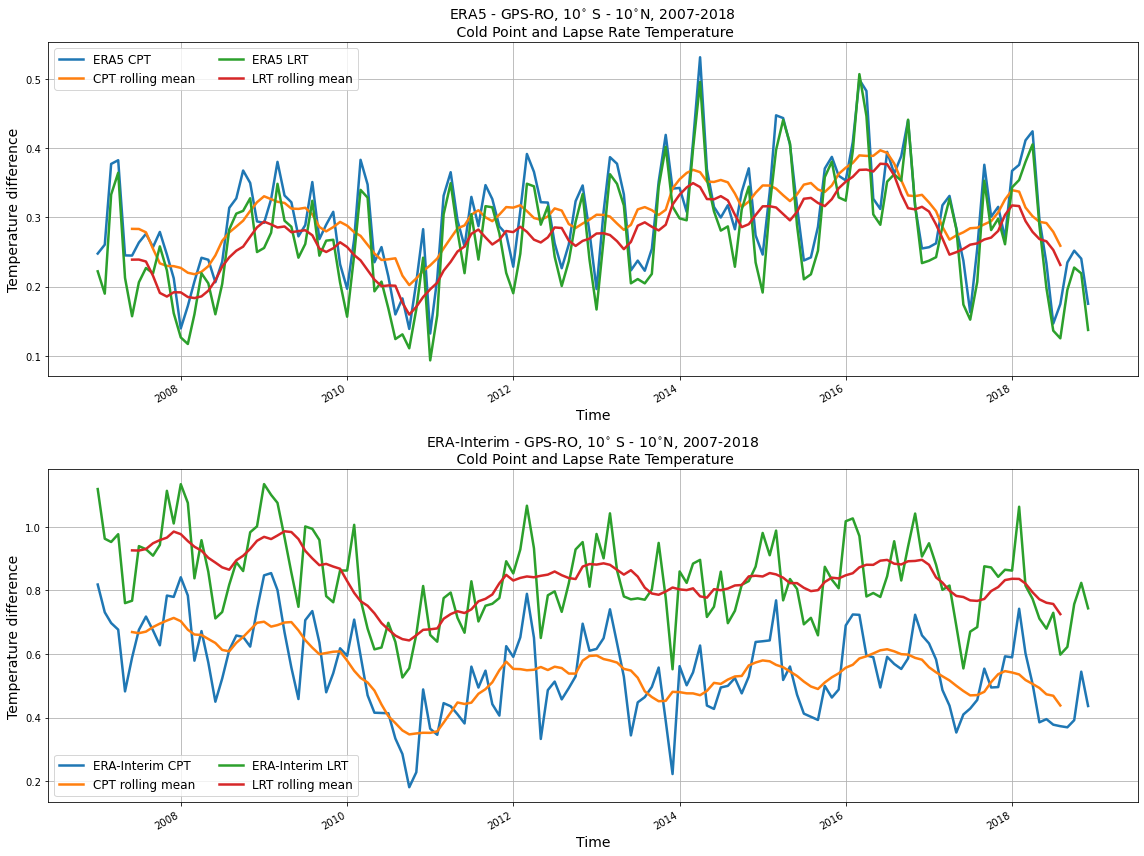

In [11]:
fig, axs = plt.subplots(2,1, figsize=(16,12))

diff3_ctpt_era5.plot(ax=axs[0], label = 'ERA5 CPT', lw=2.5)
diff3_ctpt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], label = 'CPT rolling mean', lw=2.5)
diff3_lrt_era5.plot(ax=axs[0], label = 'ERA5 LRT', lw=2.5)
diff3_lrt_era5.rolling(time=10, center=True).mean().plot(ax=axs[0], label = 'LRT rolling mean', lw=2.5)
axs[0].set_title('ERA5 - GPS-RO, 10$^{\circ}$ S - 10$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)

diff3_ctpt_erai.plot(ax=axs[1], label = 'ERA-Interim CPT', lw=2.5)
diff3_ctpt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], label='CPT rolling mean', lw=2.5)
diff3_lrt_erai.plot(ax=axs[1], label = 'ERA-Interim LRT', lw=2.5)
diff3_lrt_erai.rolling(time=10, center=True).mean().plot(ax=axs[1], label='LRT rolling mean', lw=2.5)
axs[1].set_title('ERA-Interim - GPS-RO, 10$^{\circ}$ S - 10$^{\circ}$N, 2007-2018 \n Cold Point and Lapse Rate Temperature',
                fontsize=14)


for ax in axs:
    ax.legend(ncol = 2, fontsize=12)
    ax.grid()
    ax.set_ylabel('Temperature difference', fontsize=14)
    ax.set_xlabel('Time', fontsize=14)
    
plt.tight_layout()
#fig.savefig('fig/timeseries_era5-erai-gpsro_1010_cpt-lrt.png')